In [ ]:
# Luqman Haries - 1301180072
# IF 41 GAB01
# Random Walk TUBES - Visualiasi persebaran virus

#INIT

In [ ]:
#pip install celluloid

In [ ]:
# Library
import numpy as np                    # number processing
from IPython.display import HTML      # display as html
from numpy import random              # random number
from celluloid import Camera          # matplot animation
from matplotlib import animation      # animation
import matplotlib.pyplot as plt       # visualiasi

In [ ]:
#INIT
fig = plt.figure()
camera = Camera(fig)

#individu
pos_x = []
pos_y = []
status = []
recover = []

#statement
iteration = 0
sum_iteration = []
infected = []
sum_infected = []

#global
n_individu = 200
recover_time = 10

#probalitas
infected_proba = 0.05
move_proba = 0.8

#ploting variable iteration
infected_indv_x_pos = []
infected_indv_y_pos = []
healthy_indv_x_pos = []
healthy_indv_y_pos = []

<Figure size 432x288 with 0 Axes>

In [ ]:
def Initial():
  for i in range(n_individu):
    #random position
    pos_x.append(random.randint(0, 20))
    pos_y.append(random.randint(0, 20))

    #random prob infected
    if (np.random.uniform(0, 1) <= infected_proba):
      status.append('infected')
      recover.append(recover_time)
      sum_infected.append(1)
      
    #status normal recover 0
    else:
      status.append('normal')
      recover.append(0)
      sum_infected.append(0)

#UPDATE STATE

In [ ]:
def MoveIndividual(pos_x, pos_y):
  rand = random.random()
  if (np.random.uniform(0, 1) >= move_proba):
    #right
    if(rand > 0.125) and (rand <= 0.25):
      pos_x += 1

    #down
    elif(rand > 0.375) and (rand <= 0.5):
      pos_y -= 1
    
    #left
    elif(rand > 0.625) and (rand <= 0.75):
      pos_x -= 1

    #up
    else:
      pos_y += 1
  
  return pos_x, pos_y

In [ ]:
def PeriodicBoundary(pos_x,pos_y, min_pos, max_pos):
  range_pos = [(max_pos - min_pos),(max_pos - min_pos)]

  if(pos_x > max_pos):
    pos_x-= range_pos[0]
  if(pos_x < min_pos):
    pos_x += range_pos[0]

  if(pos_y > max_pos):
    pos_y -= range_pos[1]
  if(pos_y < min_pos):
    pos_y += range_pos[1]
  
  return pos_x, pos_y

In [ ]:
def StatusChange():
  #loop x
  for i in range(n_individu):
    
    #loop y
    for j in range(n_individu):
      
      #individu tidak sama
      if (i != j):
        
        #cek posisi sama and imun
        if ((pos_x[i] == pos_x[j]) and (pos_y[i] == pos_y[j])) and ((recover[i] != -1) and (recover[j] != -1)):

          #infected
          if (status[i] == 'infected') and (status[j] == 'normal'):
            status[j] = 'infected'
            recover[j] = recover_time
          #infected
          elif (status[i] == 'normal') and (status[j] == 'infected'):
            status[i] = 'infected'
            recover[i] = recover_time

In [ ]:
def GetHealthy():
  for i in range(n_individu):
    #defected
    if (recover[i] > 0):
      recover[i] -= 1
      
    #imun
    elif (recover[i] == 0 and status[i] == 'infected'):
      recover[i] = -1
      status[i] = 'normal'


#MAIN SIMULASI PLOT

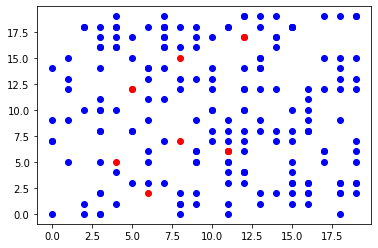

<Figure size 432x288 with 0 Axes>

In [ ]:
#INITIAL STATE
Initial()
iteration += 1
StatusChange()
#get total infected and append to list plot
for i in range(n_individu):
  if (status[i] == 'infected'):
    infected_indv_x_pos.append(pos_x[i]) 
    infected_indv_y_pos.append(pos_y[i])
  else:
    healthy_indv_x_pos.append(pos_x[i])
    healthy_indv_y_pos.append(pos_y[i])
#ploting iteration
plt.plot(infected_indv_x_pos, infected_indv_y_pos, 'ro') 
plt.plot(healthy_indv_x_pos, healthy_indv_y_pos, 'bo')

camera.snap()
sum_iteration.append(iteration)
infected.append(sum(sum_infected))

plt.show()

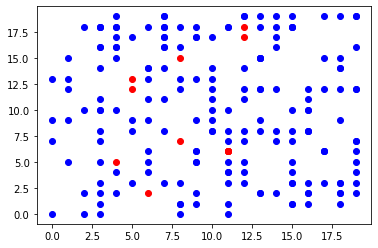

None


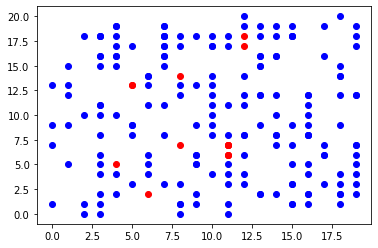

None


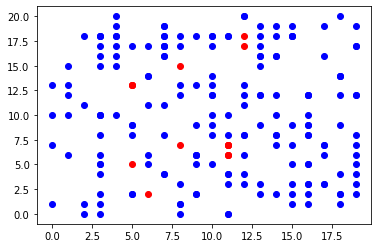

None


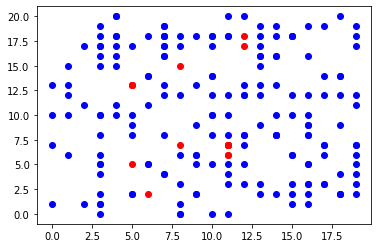

None


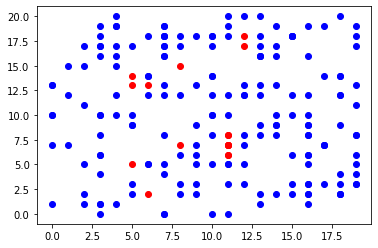

None


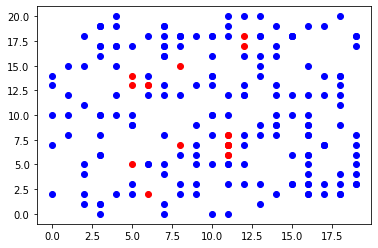

None


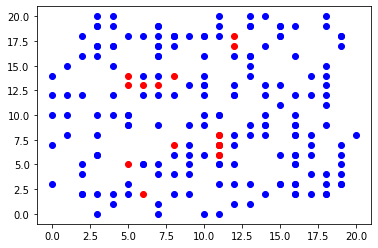

None


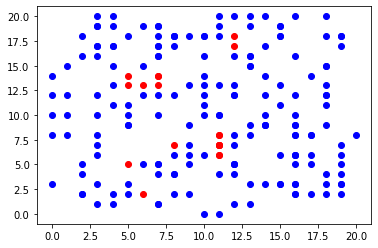

None


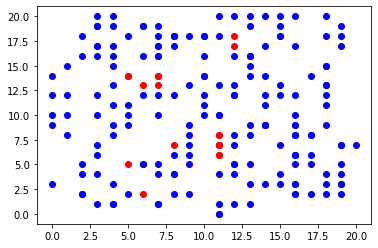

None


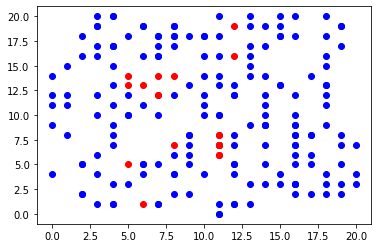

None


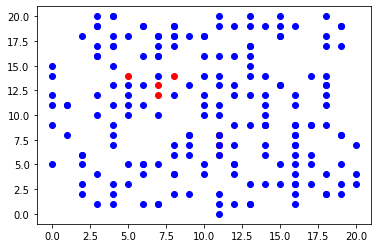

None


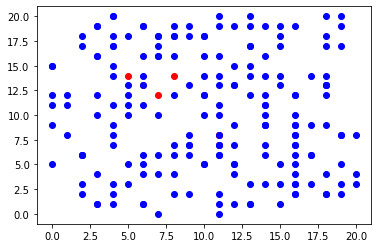

None


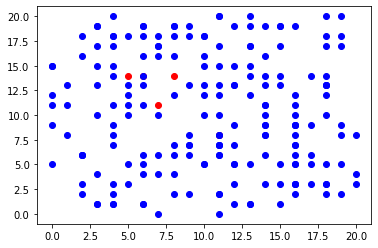

None


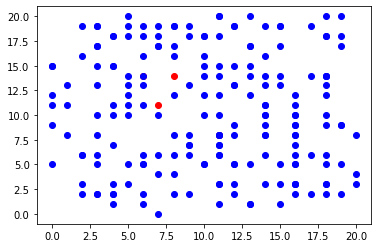

None


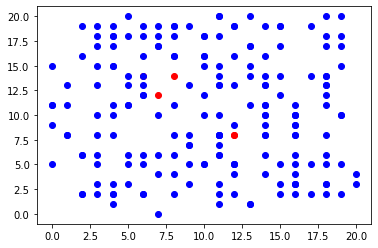

None


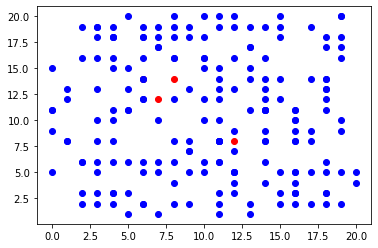

None


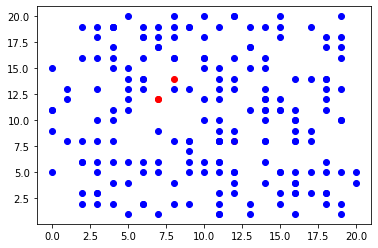

None


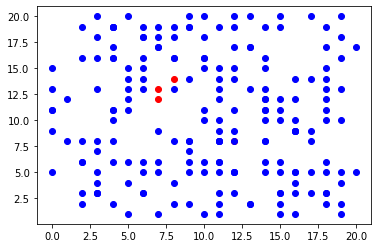

None


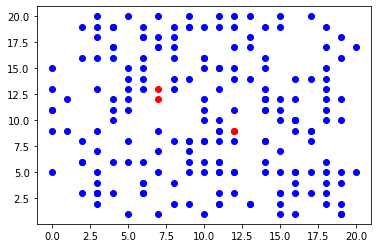

None


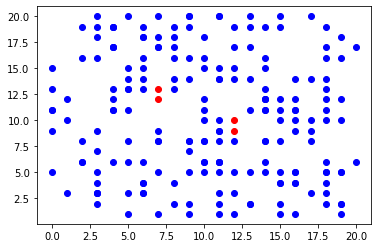

None


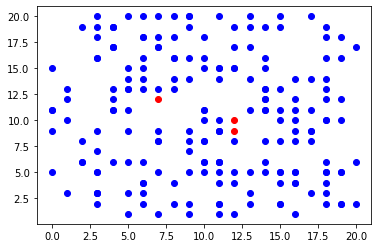

None


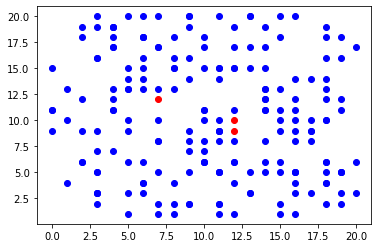

None


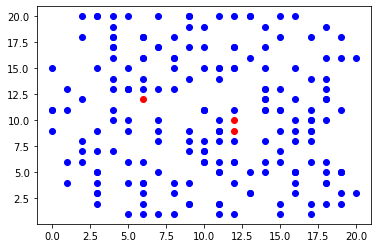

None


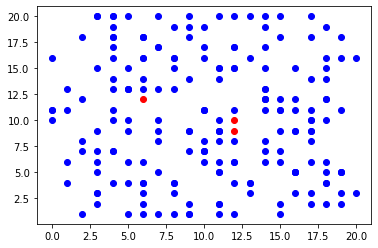

None


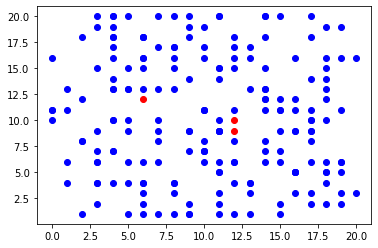

None


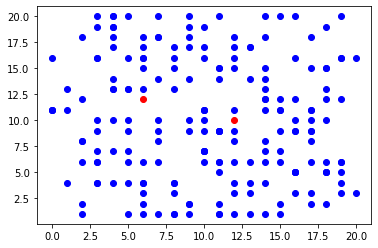

None


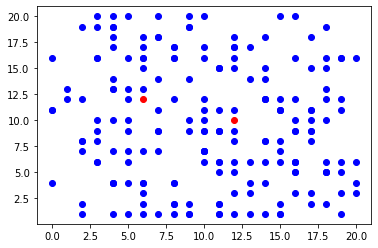

None


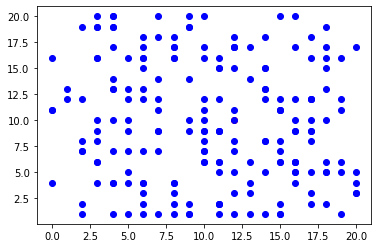

None


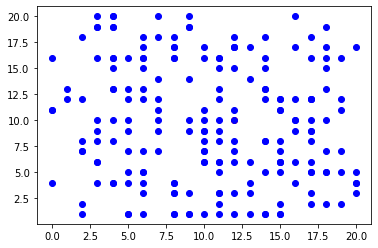

None


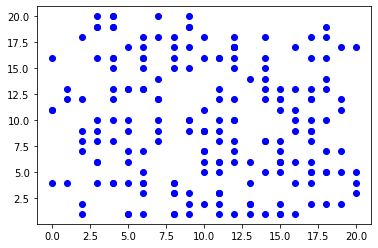

None


<Figure size 432x288 with 0 Axes>

In [ ]:
#SECOND STATE / ITERATE while infected[-1] != 0
while infected[-1] != 0:
  iteration += 1
  GetHealthy()

  #reset state
  sum_infected = []

  infected_indv_x_pos = []
  infected_indv_y_pos = []
  healthy_indv_x_pos = []
  healthy_indv_y_pos = []

  for i in range(n_individu):
    #individu move update
    pos_x[i],pos_y[i] = MoveIndividual(pos_x[i],pos_y[i])
    pos_x[i],pos_y[i] = PeriodicBoundary(pos_x[i],pos_y[i],0,20)
  StatusChange()

  #get total infected and append to list plot
  for i in range(n_individu):
    if (status[i] == 'infected'):
      sum_infected.append(1)
      infected_indv_x_pos.append(pos_x[i]) 
      infected_indv_y_pos.append(pos_y[i])
    else:
      sum_infected.append(0)
      healthy_indv_x_pos.append(pos_x[i])
      healthy_indv_y_pos.append(pos_y[i])
  #ploting iteration
  plt.plot(infected_indv_x_pos, infected_indv_y_pos, 'ro') 
  plt.plot(healthy_indv_x_pos, healthy_indv_y_pos, 'bo')
  
  print(plt.show())

  camera.snap()
  sum_iteration.append(iteration)
  infected.append(sum(sum_infected))
  #end while

#ploting animation
animation = camera.animate()
animation.save('animation.mp4')
HTML(animation.to_html5_video())

Text(0.5, 0.98, 'Persebaran infected dari hari ke hari')

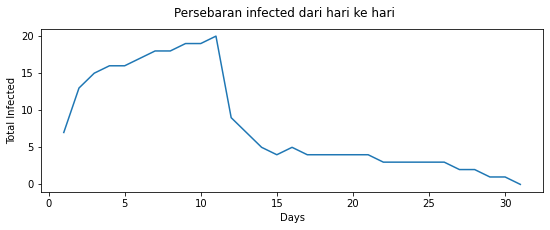

In [ ]:
days = sum_iteration
total_infected = infected

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.plot(days, total_infected)
plt.xlabel('Days')
plt.ylabel('Total Infected')
fig.suptitle('Persebaran infected dari hari ke hari')

In [ ]:
print(recover)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]


In [ ]:
print(infected,len(infected))

[7, 13, 15, 16, 16, 17, 18, 18, 19, 19, 20, 9, 7, 5, 4, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 0] 31


In [ ]:
print(sum(sum_infected))

0


In [ ]:
print(infected[-1])

0


In [ ]:
print(len(pos_x))

200


In [ ]:
print(sum_iteration)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [ ]:
print(status.count('infected'))

0
